Hebbian: w = [0. 0. 0.]


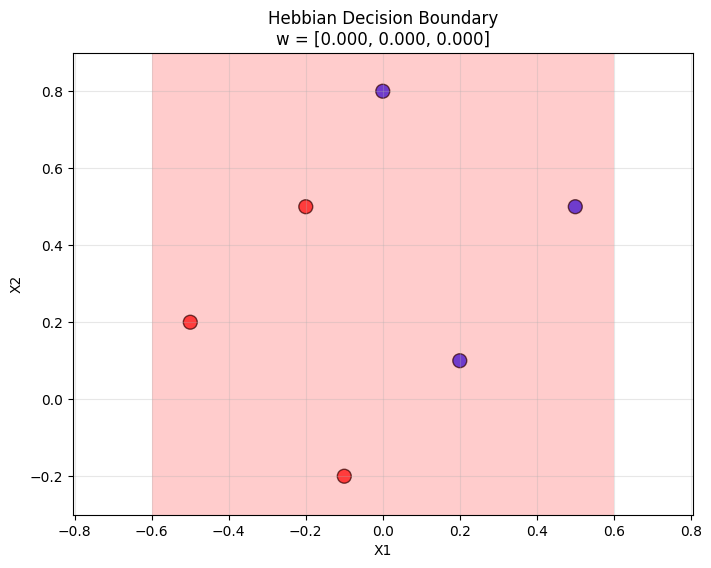

Percetron: w = [1.  0.3 0. ]


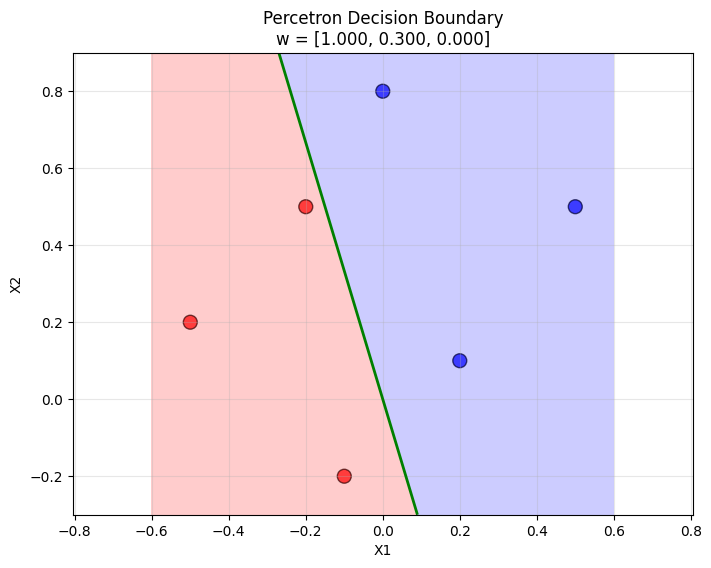

Delta: w = [1.28517043 0.83043797 0.17227481]


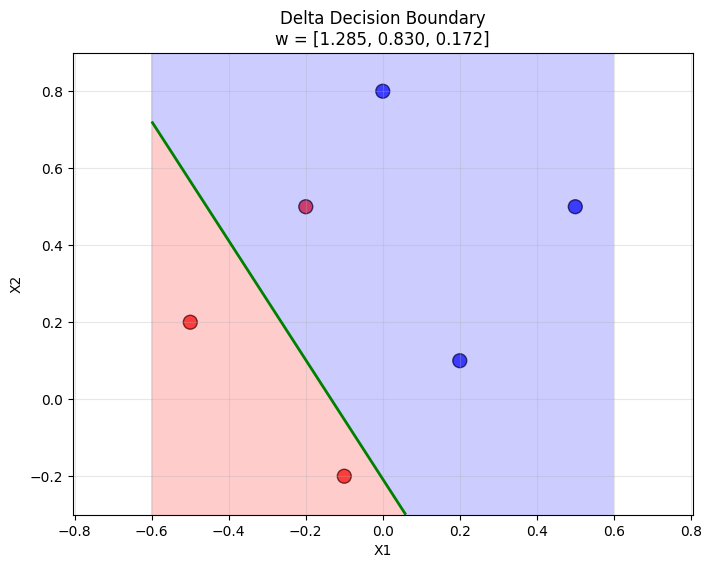

Widrow-HoffLMS: w = [1.43255633 0.78672767 0.2705325 ]


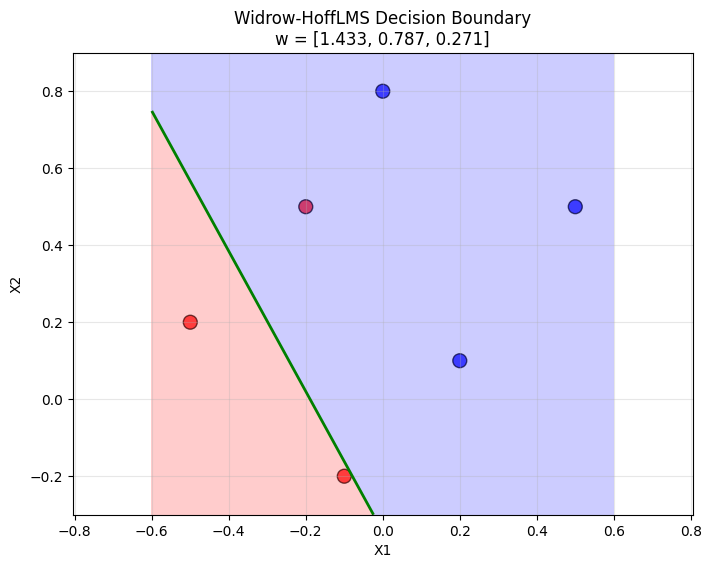

Correlation: w = [1.5 0.9 0. ]


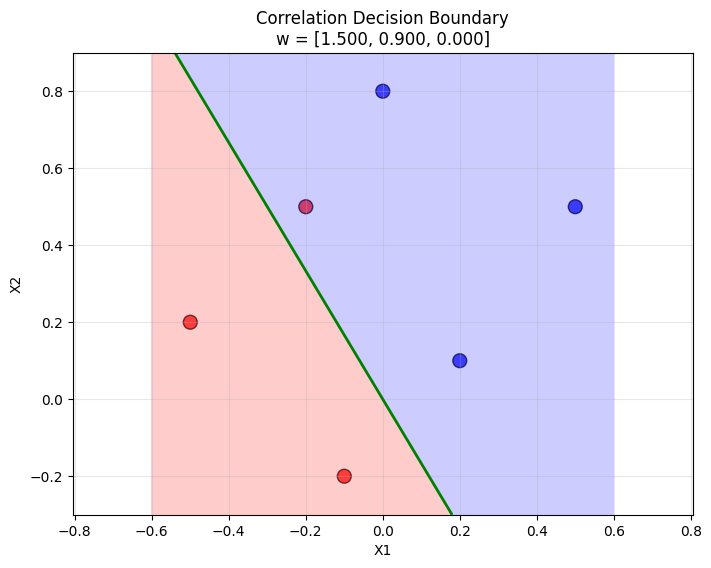

In [24]:
import matplotlib.pyplot as plt
import numpy as np


class Hebbian():
    def __init__(self):
        self.w = np.array([0.0, 0.0, 0.0])  # w1, w2, b
        self.lr = 0.5
    
    def train(self, X, y):
        output = np.tanh(np.dot(X, self.w))

        self.w += self.lr * output * X

        return self.w
    

class Percetron():
    def __init__(self):
        self.w = np.array([0.0, 0.0, 0.0])  # w1, w2, b
        self.lr = 0.5
    
    def train(self, X, y): 
        output = np.dot(X, self.w)
        output = y - (1 if output >= 0 else -1) 
             
        self.w += self.lr * output * X  

        return self.w
    
    
class Delta():
    def __init__(self):
        self.w = np.array([0.0, 0.0, 0.0])  # w1, w2, b
        self.lr = 0.5
    
    def train(self, X, y): 
        output = np.tanh(np.dot(X, self.w))
        output = (y - output) * ((1 / np.cosh(output)) ** 2)
       
        self.w += self.lr * output * X  

        return self.w
    

class Widrawhoff():
    def __init__(self):
        self.w = np.array([0.0, 0.0, 0.0])  # w1, w2, b
        self.lr = 0.5
    
    def train(self, X, y):
        output = y - np.dot(X, self.w)   
        self.w += self.lr * output * X  

        return self.w
    

class Correlation():
    def __init__(self):
        self.w = np.array([0.0, 0.0, 0.0])  # w1, w2, b
        self.lr = 0.5
    
    def train(self, X, y):  
        self.w += self.lr * y * X     

        return self.w
    

def plot_decision_boundary(w, X, y, title):
    """绘制决策边界"""
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    colors = ['red' if label == -1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7, edgecolors='black')
    
    # 生成决策边界
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # 创建网格点
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 计算每个网格点的决策值
    Z = w[0] * xx + w[1] * yy + w[2]
    
    # 绘制决策边界 (Z=0 的等高线)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
    
    # 填充决策区域
    plt.contourf(xx, yy, Z, levels=[-100, 0, 100], alpha=0.2, colors=['red', 'blue'])
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{title} Decision Boundary\nw = [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()


if __name__ == '__main__':
    # load the data
    coordinates = np.array([[x[0], x[1], 1] for x in [(-0.1, -0.2), (0.5, 0.5), (-0.5, 0.2), (-0.2, 0.5), (0.2, 0.1), (0, 0.8)]])
    labels = np.array([-1, 1, -1, -1, 1, 1])
    EPOCH = 2
    # initiate the models 
    model_name = ['Hebbian', 'Percetron', 'Delta', 'Widrow-HoffLMS', 'Correlation']
    model = [Hebbian(), Percetron(), Delta(), Widrawhoff(), Correlation()]
    trained_result = []

    # 训练模型并可视化结果
    for i, (name, net) in enumerate(zip(model_name, model)):
        for epoch in range(EPOCH):
            for x, y in zip(coordinates, labels):
                net.train(x, y)
        
        trained_result.append(net.w)
        print(f"{name}: w = {net.w}")
        
        # 可视化决策边界
        plot_decision_boundary(net.w, coordinates[:, :2], labels, name)
    